In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
#from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
#load the dataset
dataset = pd.read_csv('CC GENERAL.csv')
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
#show the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [93]:
#check the sum of the missing values
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [94]:
#let's replace the missing values of the differents columns
#replace the missing values of CREDIT_LIMIT
dataset.fillna({'CREDIT_LIMIT': dataset['CREDIT_LIMIT'].mean()}, inplace=True)
#replace the missing values of MINIMUM_PAYMENTS
dataset.fillna({'MINIMUM_PAYMENTS': dataset['MINIMUM_PAYMENTS'].mean()}, inplace=True)
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [95]:
#drop first of all the columns CUST_ID
dataset.drop('CUST_ID', axis=1, inplace=True)

In [96]:
#we will do the scalling features
scaler = StandardScaler()
X = scaler.fit_transform(dataset.values)
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [97]:
#use the hierarchical clustering to identify the inherant grouping within our data
#Agglmerative Example
#apllying the agglomerative algorithm with 5 clusters, using euclidean distance
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(X)
#print each points corresponding clusters
agglomerative = pd.DataFrame(clust_labels)
agglomerative[0].value_counts()

1    8892
4      27
0      23
3       7
2       1
Name: 0, dtype: int64

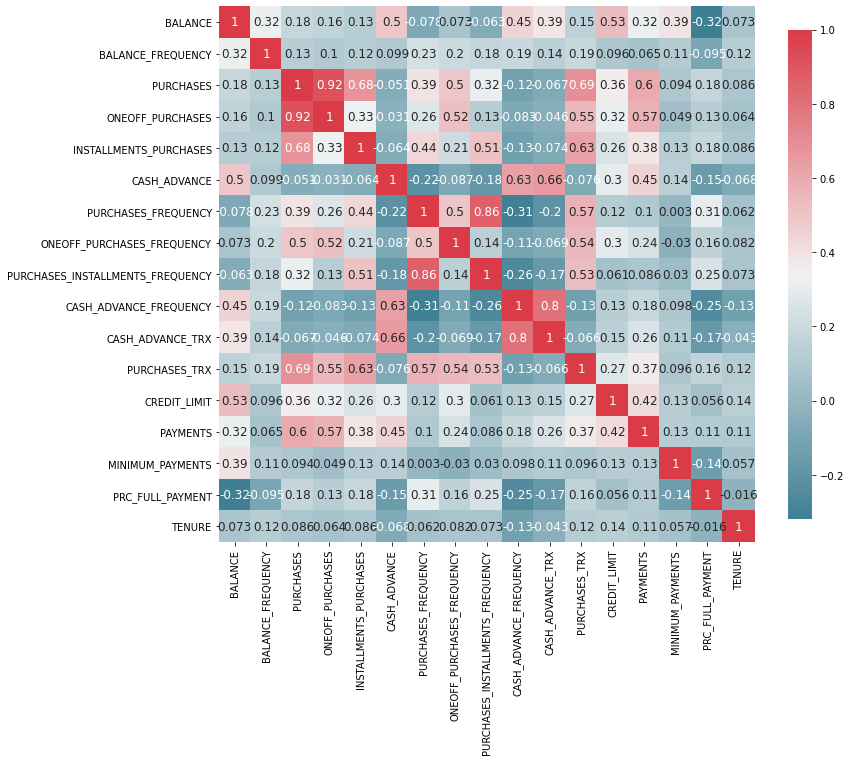

In [98]:
#agglomerative clusters plot
#choose the best columns with the correlation matrix
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(dataset)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


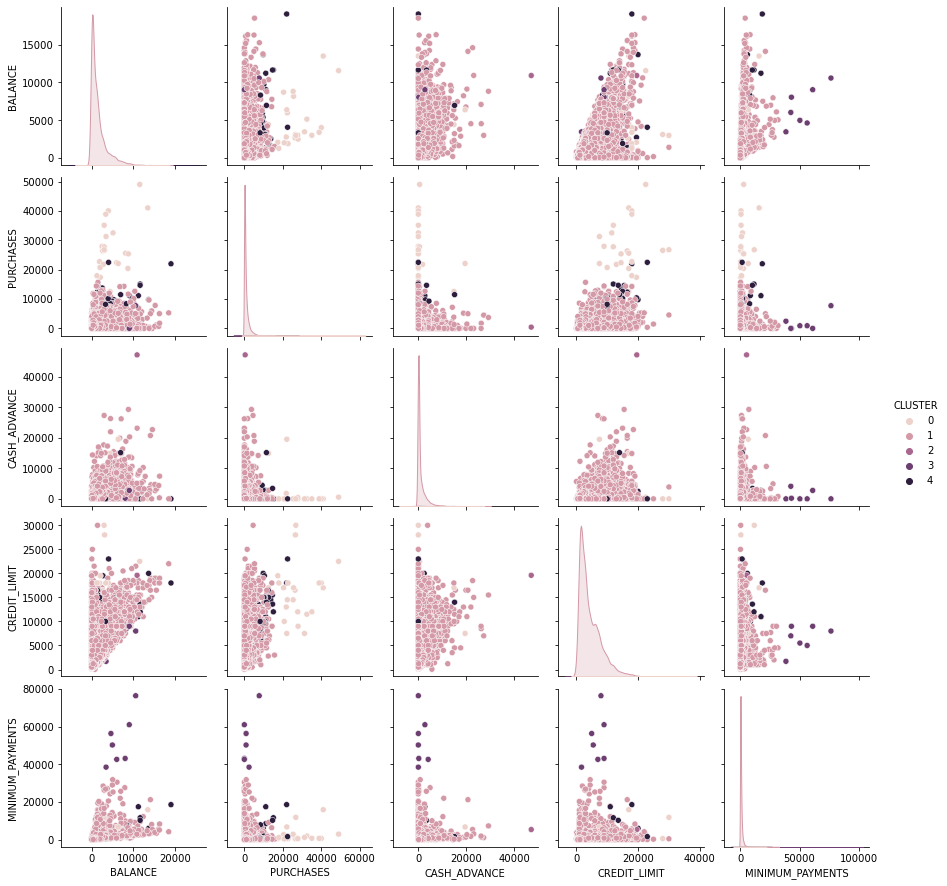

In [99]:
#agglomerative cluster plot
#fig = plt.figure()
#axes = fig.add_subplot(111)
#scatter = axes.scatter(X[:,0], X[:,10], c=agglomerative[0], s=50)
#axes.set_title('Agglomerative Clustering')
#axes.set_xlabel('CREDIT_LIMIT')
#axes.set_ylabel('PAYMENTS')
#plt.colorbar(scatter)
agglomerative.columns = ['CLUSTER']#apoint the column of the the agglomerative in CLUSTER
clusters = pd.concat([dataset, agglomerative], axis=1)#concat the dataset end and the cluster
#choose the best columns from the correlation matrix
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "MINIMUM_PAYMENTS", "CLUSTER"]
sns.pairplot(clusters[best_cols], hue="CLUSTER")
#clusters.head()
#for c in clusters:
#    grid = sns.FacetGrid(clusters, col='CLUSTER')
#    grid.map(plt.hist, c)

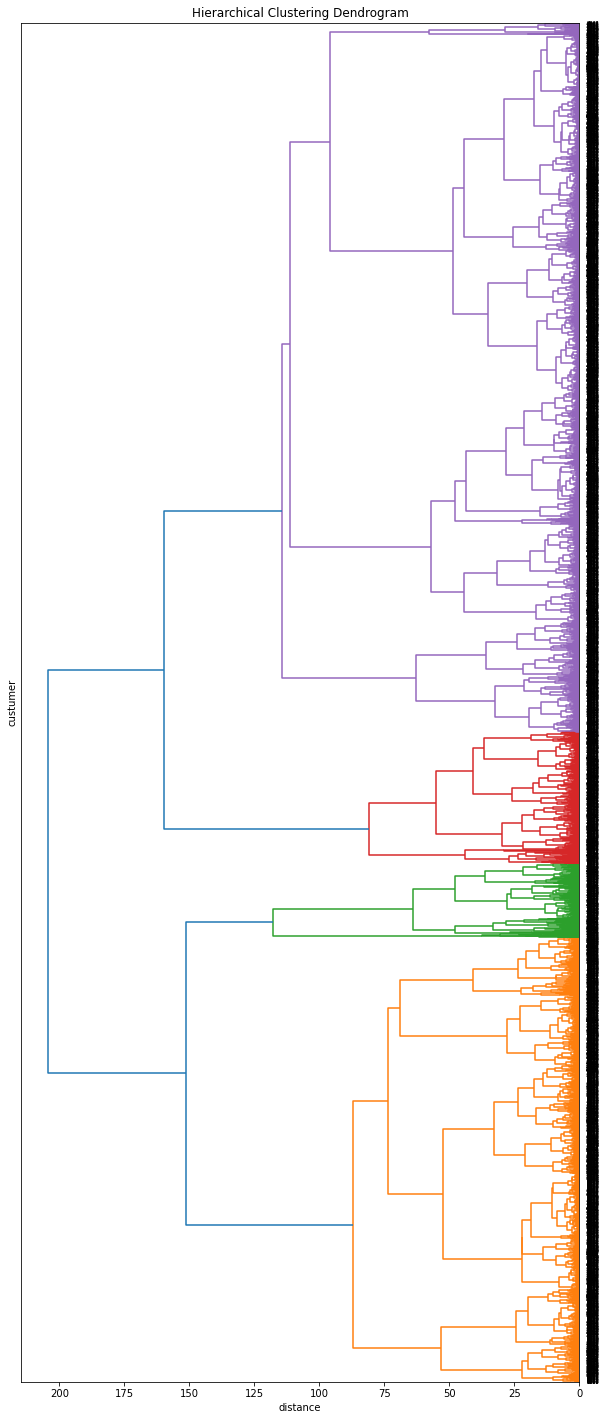

In [100]:
#plot the dendrogram
#define a function for the ploting of the dendrogram
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10, 25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    plt.ylabel('custumer')
    sch.dendrogram(Z, 
              labels=names,
              orientation="left",
              )
    plt.show()
Z = sch.linkage(X, 'ward')
plot_dendrogram(Z, dataset.index)

Text(0, 0.5, 'Sum of squared error')

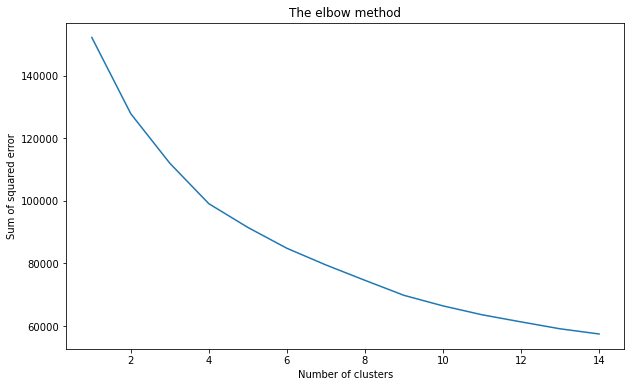

In [101]:

#kmeans method
plt.figure(figsize=(10, 6))
n_clusters = 15
sse = [] #array contain the sum of squared error
#try differents values of k and selected the best
for i in range(1, n_clusters):
    kmean = KMeans(i, init='k-means++', random_state = 42)
    kmean.fit(X)
    sse.append(kmean.inertia_)
plt.plot(range(1, n_clusters), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')

In [102]:
# from the elbow method(the graph above), 8 is the best value of kmeans, lets define clusters = 8
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmean.cluster_centers_

array([[ 1.93962697e+00,  3.24459676e-01,  1.28203884e+01,
         1.34149202e+01,  5.66704376e+00,  1.68500244e-02,
         1.02257060e+00,  2.14777914e+00,  8.32903514e-01,
        -4.67130413e-01, -2.02980153e-01,  4.48100700e+00,
         3.13101517e+00,  9.12058633e+00,  1.11998384e+00,
         1.26459887e+00,  2.92748527e-01],
       [-1.42136550e-01,  3.91484687e-01, -3.45490712e-01,
        -2.31460784e-01, -3.91484685e-01, -2.86352110e-01,
        -8.15371687e-01, -3.87263941e-01, -7.25777186e-01,
        -2.67700650e-01, -2.78280197e-01, -4.74242748e-01,
        -3.82707474e-01, -3.13415496e-01, -8.19706334e-02,
        -4.57804578e-01,  2.83153751e-01],
       [-7.05615010e-01,  3.80871686e-02, -2.58097855e-02,
        -2.61875389e-01,  4.19498802e-01, -4.54882373e-01,
         8.68467665e-01, -3.94798065e-01,  1.04001523e+00,
        -6.54567956e-01, -4.65911723e-01,  8.98222597e-02,
        -1.14917990e-01, -2.25322109e-01, -2.90848542e-01,
         2.17313285e+00,  1.0

In [103]:
#show the cluster for each custumer
y_kmeans = kmeans.predict(X)
dataset['CLUSTER'] = y_kmeans #create an new column and call them 'CLUSTER', it contain the prediction values within kmeans
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


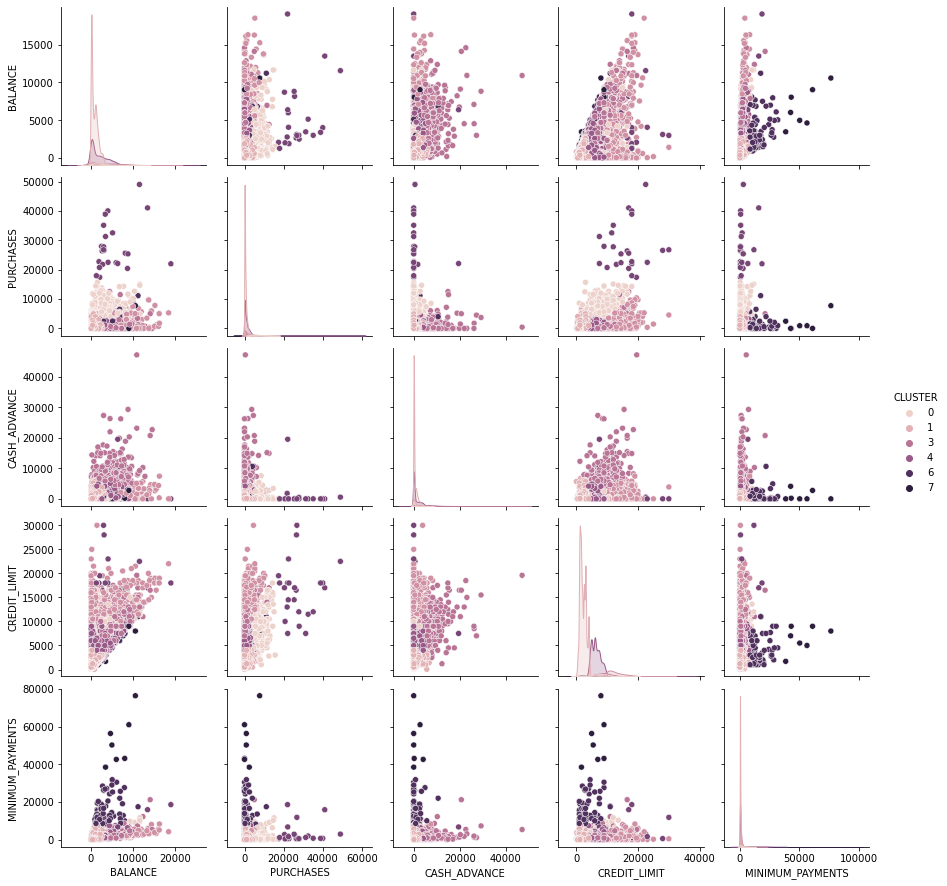

In [104]:
#choose the best columns from the correlation matrix
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "MINIMUM_PAYMENTS", "CLUSTER"]
kmeans = KMeans(n_clusters=8,
               init="k-means++",
               n_init=10,
               max_iter=300)
best_vals = dataset[best_cols].iloc[:, 1:].values
y_pred = kmeans.fit_predict(best_vals)#represent the prediction values with kmeans for only the best columns
dataset['CLUSTER'] = y_pred#replace the values of dataset.CLUSTER by the values of y_pred
sns.pairplot(dataset[best_cols], hue="CLUSTER")#plot the clusters within kmeans

### comparison
we see that the segmentation of clusters is more visible with the kmeans than with hierarchical clustering

In [105]:
#use an other validation metrix
#use the adjusted rand score
metrics.adjusted_rand_score(kmeans.labels_, y_pred)

1.0

### interprétation
the  ajusted rand score is equal to 1 so the clustering are identical